In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')
sns.set_palette('rocket')

In [3]:
df = pd.read_csv('census-income.data', delimiter = ',')

In [4]:
df.columns = ['age', 'workclass','sdfdsf', 'education_level', 'education_no', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32560 non-null  int64 
 1   workclass        32560 non-null  object
 2   sdfdsf           32560 non-null  int64 
 3   education_level  32560 non-null  object
 4   education_no     32560 non-null  int64 
 5   marital_status   32560 non-null  object
 6   occupation       32560 non-null  object
 7   relationship     32560 non-null  object
 8   race             32560 non-null  object
 9   sex              32560 non-null  object
 10  capital_gain     32560 non-null  int64 
 11  capital_loss     32560 non-null  int64 
 12  hours_per_week   32560 non-null  int64 
 13  country          32560 non-null  object
 14  income           32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.head()

,age,workclass,sdfdsf,education_level,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

In [7]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

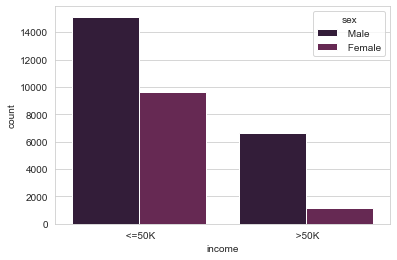

In [8]:
sns.countplot(x='income', data = df, hue = 'sex')

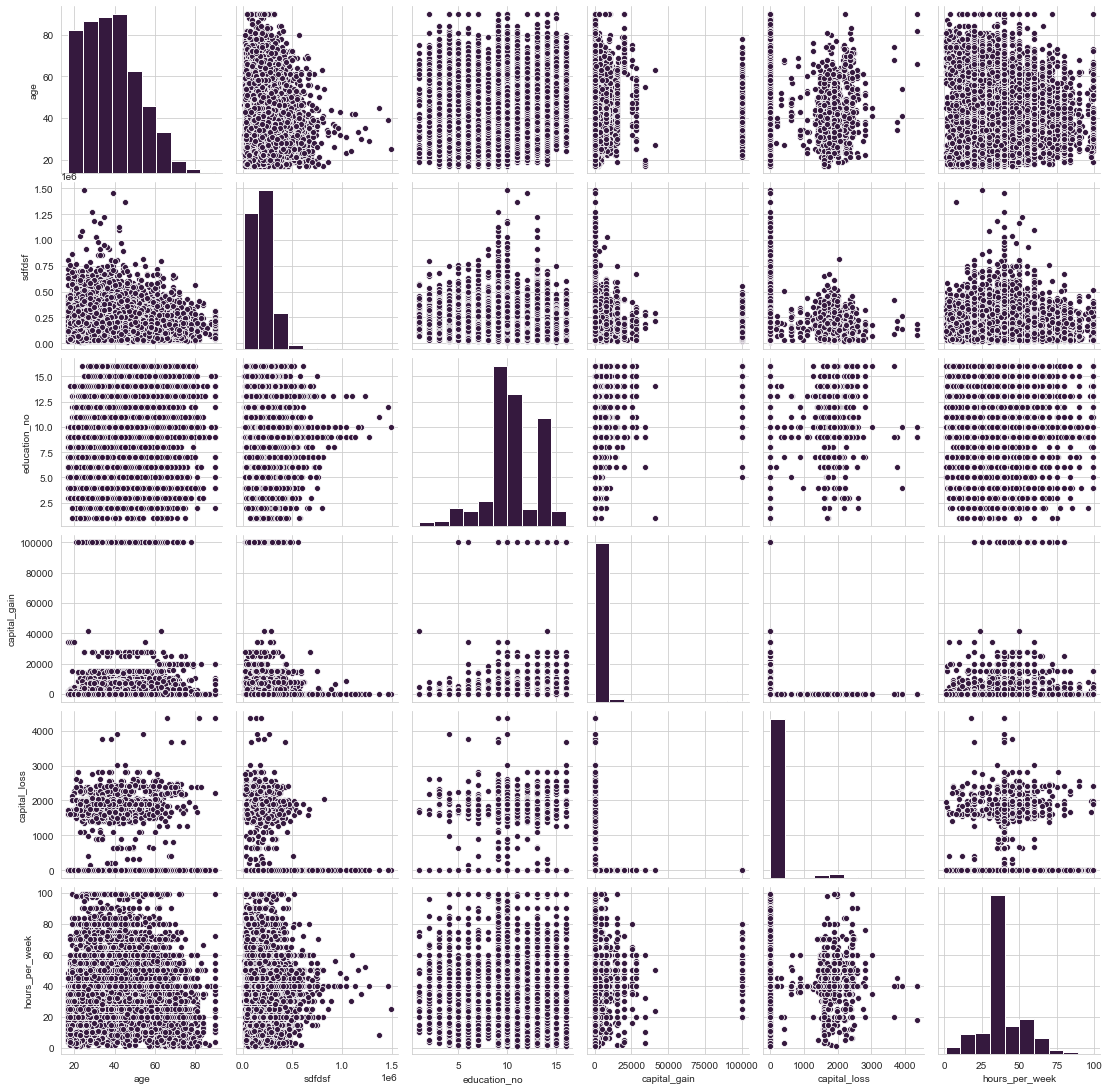

In [9]:
#sns.pairplot(df)

There is no relation among any two variables.

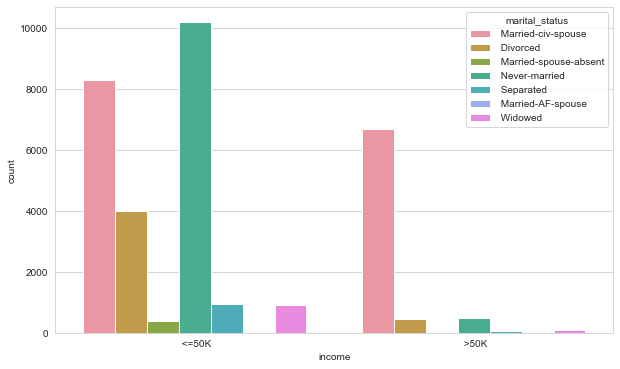

In [10]:
sns.set_palette('rocket')
plt.figure(figsize=(10, 6))
sns.countplot(df['income'], hue = df['marital_status'])

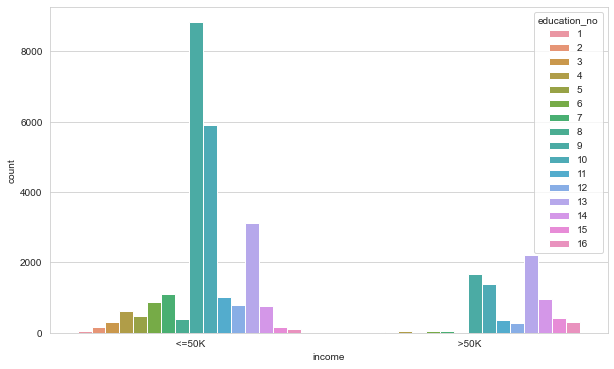

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(df['income'], hue = df['education_no'])

In [12]:
df['education_no'].value_counts()
#sns.jointplot(x = 'education_level', y = 'education_no', data = df)

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_no, dtype: int64

In [13]:
df['education_level'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education_level, dtype: int64

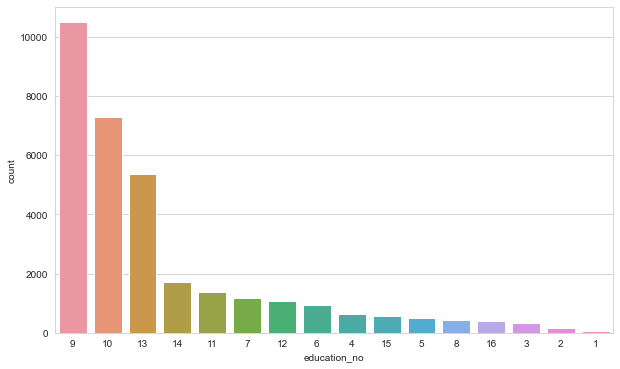

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(df['education_no'], order = df['education_no'].value_counts().index)

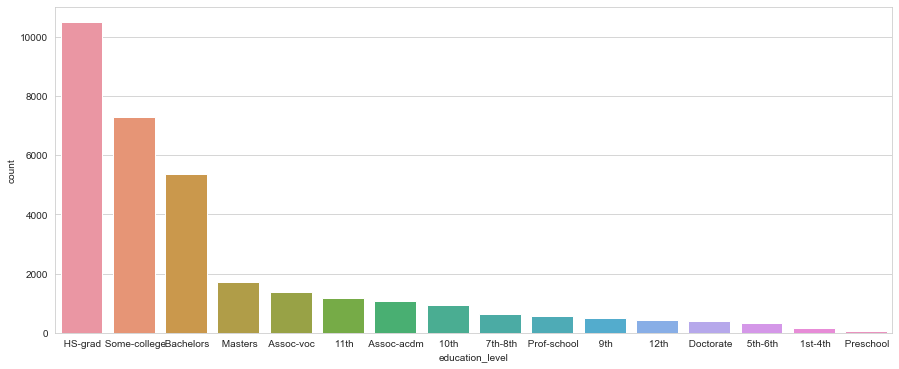

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(df['education_level'], order = df['education_level'].value_counts().index) 


Both of the attributes education_level and education_no are representing exactly same thing, so we 
can drop any one of them

In [16]:
df.drop(['sdfdsf', 'education_level'], axis = 1, inplace = True )

In [18]:
df.head()

,age,workclass,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


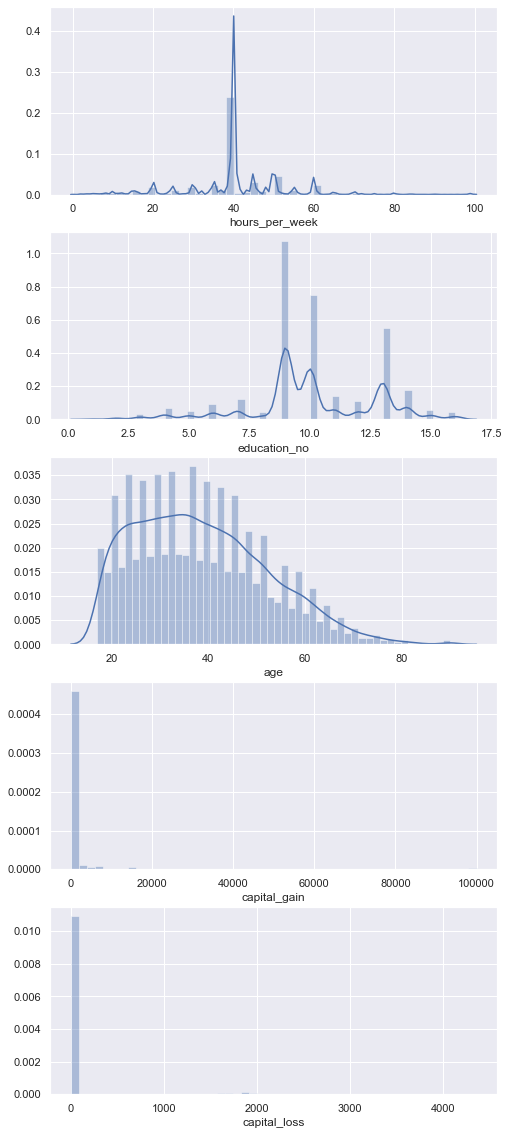

In [19]:
plt.figure(figsize = (8,20))
sns.set(font_scale=1)
#plt.xlabel(size = 20)
plt.subplot(5,1,1)
sns.distplot(df['hours_per_week'])
plt.subplot(5,1,2)
sns.distplot(df['education_no'])
plt.subplot(5,1,3)
sns.distplot(df['age'])
plt.subplot(5,1,4)
sns.distplot(df['capital_gain'])
plt.subplot(5,1,5)
sns.distplot(df['capital_loss'])
#plt.tight_layout()

Apart from Capital_gain and capital_loss attribute, all are looking normally distributed. So before deploying ML model, we will normalize the values of these attributes

Let's try both way, with and without normalizing values

In [20]:
x = df.drop(['income'], axis = 1)
y = df['income']

In [21]:
x.head()

,age,workclass,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40


In [22]:
skewed_data = ['capital_gain', 'capital_loss']
log_transformed = pd.DataFrame(data = x)

log_transformed[skewed_data] = log_transformed[skewed_data].apply(lambda x: np.log(x+1))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
attributes = ['age','education_no', 'capital_gain', 'capital_loss', 'hours_per_week']
scaled_data = pd.DataFrame(data = log_transformed)
scaled_data[attributes] = scaler.fit_transform(scaled_data[attributes])
scaled_data.head()

,age,workclass,education_no,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
0,0.452055,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,0.122449
1,0.287671,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,0.397959
2,0.493151,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,0.397959
3,0.150685,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,0.397959
4,0.273973,Private,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,0.397959


In [29]:
scaled_data['sex'].values

array([' Male', ' Male', ' Male', ..., ' Female', ' Male', ' Female'],
      dtype=object)

In [30]:
scaled_data['sex'].replace({' Male':1, ' Female':0})

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name: sex, Length: 32560, dtype: int64

In [31]:
scaled_data.shape

(32560, 11)

One-hot encoding technique for treating categorical variable

In [32]:
final_attributes = pd.get_dummies(scaled_data)
final_attributes.head()

,age,education_no,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
2,0.493151,0.400000,0.0,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,0.150685,0.800000,0.0,0.0,0.397959,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,0.273973,0.866667,0.0,0.0,0.397959,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [33]:
final_attributes.columns

Index(['age', 'education_no', 'capital_gain', 'capital_loss', 'hours_per_week',
       'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupati

In [34]:
target = pd.DataFrame(data = y)
final_target = target.replace({" <=50K":0, " >50K":1})
final_target.head()

,income
0,0
1,0
2,0
3,0
4,0


#### Now I need to apply PCA to X part of the dataframe  
#### Appliying PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = final_attributes.copy()
data_pca.head(2)

,age,education_no,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.452055,0.800000,0.0,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.287671,0.533333,0.0,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [36]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data_pca)
print(standardized_data.shape)

(32560, 49)


In [37]:
cov = (standardized_data.T@standardized_data)/(standardized_data.shape[0]-1)

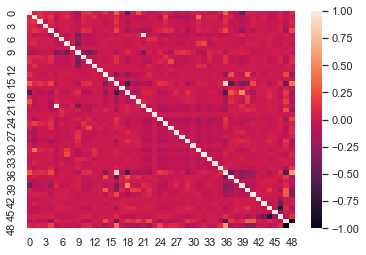

In [38]:
sns.heatmap(cov)

In [39]:
eig_values,eig_vectors = np.linalg.eig(cov)

In [40]:
idx = np.argsort(eig_values, axis =0)[::-1]
sorted_eig_vectors = eig_vectors[:,idx]

(1.0, 30.0)

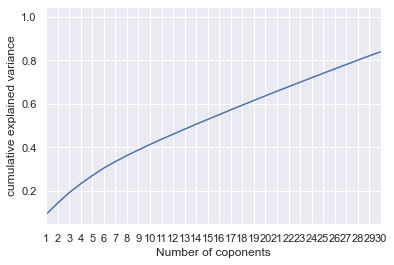

In [41]:
cumsum = np.cumsum(eig_values[idx])/np.sum(eig_values[idx])
xint = range(1,len(cumsum) + 1)
plt.plot(xint, cumsum)

plt.xlabel('Number of coponents')
plt.ylabel("cumulative explained variance")
plt.xticks(xint)
plt.xlim(1,30,1)

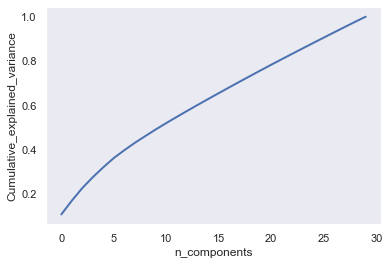

In [42]:
# PCA for dimensionality redcution (non-visualization)
sample_data = standardized_data
pca.n_components = 30
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# we have to take 25-dimensions, approx. 90% of variance is expalined.

In [43]:
pca_data

array([[-2.5871576 ,  1.16912044,  0.52565342, ..., -0.43244473,
         0.4839263 ,  1.18893559],
       [ 0.64617525, -1.11165364, -0.73692179, ...,  1.37713487,
         0.39081868,  0.01364675],
       [-1.25700485, -0.99143466,  0.19180557, ...,  1.07368169,
         0.93237884, -0.29024631],
       ...,
       [ 2.36651407,  2.60958375, -1.64265652, ..., -1.77593275,
        -1.44048038,  0.80979612],
       [ 1.80934387, -2.51573553,  0.8622871 , ..., -0.4509565 ,
        -0.31724851,  0.19728315],
       [-0.83844846,  3.38948886, -0.79165022, ...,  0.92416416,
        -0.22460891, -2.70681542]])

In [44]:
Xdata = pd.DataFrame(pca_data)

In [46]:
Xdata.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.587158,1.169120,0.525653,-0.691265,0.183801,0.054789,1.070858,1.765980,0.251856,0.092471,...,-0.090321,-0.483580,-0.382336,0.025644,-0.229572,-0.443331,0.131046,-0.432445,0.483926,1.188936
1,0.646175,-1.111654,-0.736922,-0.416062,-1.025594,-2.304215,-0.805106,-1.158618,0.130808,0.394815,...,-1.505545,-2.319237,1.727141,0.856641,0.154214,-0.864827,-0.024610,1.377135,0.390819,0.013647
2,-1.257005,-0.991435,0.191806,3.995413,1.000340,-0.203117,-0.433338,-0.653257,0.188655,-0.088780,...,-1.505861,-2.183521,1.847443,0.670149,0.264372,-1.221604,-0.013520,1.073682,0.932379,-0.290246
3,1.235441,1.944862,-1.256934,1.885966,2.265545,3.795295,-0.697713,0.311013,-1.683617,0.154842,...,-0.314672,-0.710356,0.456783,0.215421,0.282446,-0.160445,-0.196267,1.076235,1.028934,-0.690697
4,0.237641,1.741342,-1.363506,-0.713030,-0.648191,3.901005,-0.681961,0.918644,-0.040862,0.416251,...,-0.632274,-0.219576,0.153704,-0.519522,0.097864,0.039655,0.373471,0.213724,0.514135,0.724360


## Model Deployment

In [52]:
df = pd.read_csv('DistanceTimesCoordinates.csv', delimiter = ';')

In [53]:
df.columns

Index(['X_COORD', 'Y_COORD'], dtype='object')

In [54]:
df.head()

,X_COORD,Y_COORD
0,5.93411,49.96511
1,6.06652,49.55583
2,6.37219,50.16941
3,6.52321,49.97444
4,6.52547,49.95558


In [66]:
df1 = pd.read_csv('Locations - Locations.csv', delimiter = ';')

In [68]:
df1.head

<bound method NDFrame.head of     LOCATION_TYPE LOCATION_ID  POST_CODE                   CITY  X_COORD  \
0           DEPOT          D1      67069  Ludwigshafen am Rhein  8.42227   
1   SWAP_LOCATION          S1      55569              MONZINGEN  7.59357   
2   SWAP_LOCATION          S2      76131              Karlsruhe  8.41184   
3   SWAP_LOCATION          S3      68169               Mannheim  8.45037   
4   SWAP_LOCATION          S4      76646               Bruchsal  8.56241   
..            ...         ...        ...                    ...      ...   
73       CUSTOMER         C44      76337              Waldbronn  8.48940   
74       CUSTOMER         C10      76275              Ettlingen  8.36861   
75       CUSTOMER          C3      54293                  TRIER  6.69049   
76       CUSTOMER          C7      54290                  Trier  6.64845   
77       CUSTOMER         C34      76344             Eggenstein  8.37866   

     Y_COORD  QUANTITY  TRAIN_POSSIBLE  SERVICE_TIME [s] 

In [70]:
df2 = pd.read_csv('fleet.csv', delimiter=';')

In [76]:
df2.head()

,TYPE,CAPACITY,COSTS [MU/km],COSTS [MU/h],COSTS [MU/USAGE],OPERATING_TIME [s]
0,TRUCK,0,0.5,20.0,100.0,28800
1,SEMI_TRAILER,0,0.2,0.0,50.0,28800
2,SWAP_BODY,500,0.0,0.0,0.0,28800


In [79]:
df2['TYPE'].value_counts()

SWAP_BODY       1
TRUCK           1
SEMI_TRAILER    1
Name: TYPE, dtype: int64

In [ ]:
df3.read_csv()